In [2]:
import math

import numpy as np 
import matplotlib.pyplot as plt 
import torch.optim as optim 

In [6]:
def show_trace_2d(f, res):
    """Show the trace of 2D variables during optimization."""
    x1, x2 = zip(*res)
    plt.rcParams['figure.figsize'] = (3.5, 2.5)
    plt.plot(x1, x2, '-o', color='#ff7f0e')
    x1 = np.arange(-5.5, 1.0, 0.1)
    x2 = np.arange(min(-3.0, min(x2) - 1), max(1.0, max(x2) + 1), 0.1)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    
def train_2d(trainer):
    """Optimize a 2-dim objective function with a customized trainer."""
    # s1 and s2 are internal state variables and will 
    # be used later in the chapter
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

### Sparse Features and Learning Rates 
To get good accuracy we typically want to decrease the learning rate as we keep on training, usually at a rate of  $\mathcal{O}(t^{-\frac{1}{2}})$  or slower. <br/>

Now consider a model training on sparse features, i.e., features that occur only infrequently. This is common for natural language, e.g., it is a lot less likely that we will see the word preconditioning than learning. 

In [8]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

epoch 20, x1 -2.382563, x2 -0.158591


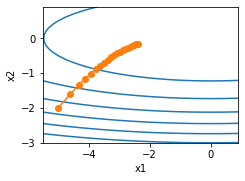

In [9]:
eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

As we increase the learning rate to  $2$  we see much better behavior. This already indicates that the decrease in learning rate might be rather aggressive, even in the noise-free case and we need to ensure that parameters converge appropriately.

epoch 20, x1 -0.002295, x2 -0.000000


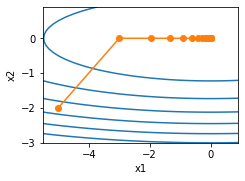

In [10]:
eta = 2 
show_trace_2d(f_2d, train_2d(adagrad_2d))

*** 
## Implementation from Scratch 

In [11]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()